# Heart Disease EDA
Exploratory Data Analysis, 탐색적 데이터 분석

### Load

In [1]:
# 데이터 탐색 및 시각화에서 많이 사용하는 패키지 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기
hd1 = pd.read_csv('cleveland.csv')
hd2 = pd.read_csv('hungarian.csv')
hd3 = pd.read_csv('switzerland.csv')
hd4 = pd.read_csv('va.csv')
hd = pd.concat([hd1, hd2, hd3, hd4], axis=0)

### Quick View

In [3]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalach   865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  num       920 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 107.8 KB


### MetaData:
- age : 나이
- sex : 성별 
    - 0 : female 여성
    - 1 : male 남성
- cp : 가슴통증(chest pain) 종류
    - 1 : typical angina 일반적인 협심증
    - 2 : atypical angina 일반적이지 않은 협심증
    - 3 : non-anginal pain 협심증이 아닌 통증
    - 4 : asymptomatic 무증상
- trestbps : 휴식 중 혈압 (resting blood pressure)
- chol : 혈중 콜레스테롤 mg/dl (serum cholesterol)
- fbs : 공복 중 혈당 (fasting blood sugar)
    - 0 : 120 mg/dl 이하
    - 1 : 120 mg/dl 초과
- restecg : 휴식 중 심전도 결과 (resting electrocardiographic)
    - 0 : 정상
    - 1 : having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - 2 : showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : 최대 심박수 (maximum heart rate achieved)
- exang : 활동으로 인한 협심증 여부 (exercise induced angina)
    - 0 : 없음
    - 1 : 있음
- oldpeak : 휴식 대비 운동으로 인한 ST 하강 (ST depression induced by exercise relative to rest)
- slope : 활동 ST 분절 피크의 기울기 (the slope of the peak exercise ST segment)
    - 1 : upsloping 상승
    - 2 : flat 평탄
    - 3 : downsloping 하강
- ca : 형광 투시로 확인된 주요 혈관 수 (number of major vessels colored by fluoroscopy)
    - 0 ~3 개
- thal : 지중해 빈혈 여부 (thalassemia)
    - 3 : normal 정상
    - 6 : fixed defect 고정 결함
    - 7 : reversible defect 가역 결함
- num(target) : 심장 질환 진단 여부
    - 0 : <50% diameter narrowing
    - 1 : >50% diameter narrowing

In [4]:
# num 변수를 통한 target 열 생성
hd['target'] = np.where(hd['num'] == 0, 0, 1)
hd = hd.drop(['num'],axis=1)

In [28]:
# 크기 및 데이터 확인
hd.head(3)
print("Heart Disease DataSet.shape:", hd.shape, '\n')

Heart Disease DataSet.shape: (299, 18) 



In [29]:
# 결측치 확인
print(hd.isna().sum())
hd = hd.dropna(axis=0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
thals       0
targets     0
cps         0
oldpeak0    0
dtype: int64


In [30]:
# 중복값 확인
print(hd.duplicated())
hd = hd.drop_duplicates().reset_index(drop=True)

0      False
1      False
2      False
3      False
4      False
       ...  
294    False
295    False
296    False
297    False
298    False
Length: 299, dtype: bool


In [31]:
# 제거 후 크기
hd.shape

(299, 18)

In [32]:
# 추후 사용을 위해 병합한 데이터프레임을 csv로 저장
hd.to_csv('./heart_disease.csv', index=False)

### EDA

In [33]:
hd = pd.read_csv('./heart_disease.csv')

In [34]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,oldpeak0
count,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000
mean,54.521739,0.67893,3.163880,131.715719,246.785953,0.143813,0.989967,149.327759,0.331104,1.058528,1.605351,0.672241,4.745819,0.464883,0.67893
std,9.030264,0.46767,0.964069,17.747751,52.532582,0.351488,0.994903,23.121062,0.471399,1.162769,0.616962,0.937438,1.940977,0.499601,0.46767
min,29.000000,0.00000,1.000000,94.000000,100.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.00000
25%,48.000000,0.00000,3.000000,120.000000,211.000000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.00000
50%,56.000000,1.00000,3.000000,130.000000,242.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,1.00000
75%,61.000000,1.00000,4.000000,140.000000,275.500000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000,1.00000
max,77.000000,1.00000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000,1.00000


### Heart Disease 분포

Text(0.5, 1.0, 'Heart Disease Diagnosis')

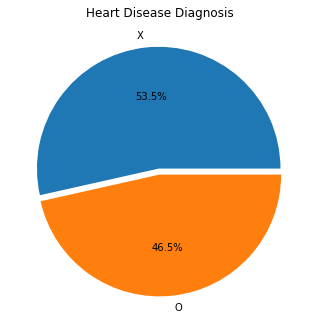

In [35]:
hd_ = hd['target'].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.pie(hd_,labels=["X","O"],explode=[0.05,0],autopct='%.1f%%')
plt.title('Heart Disease Diagnosis')

### Correlation

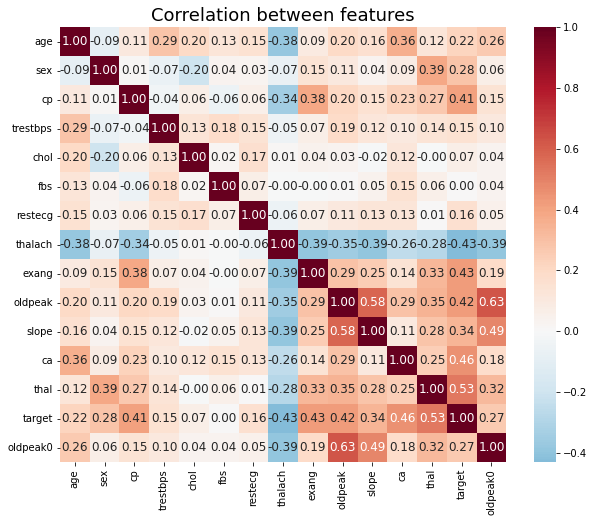

In [36]:
# 특성별 상관계수 heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(hd.corr(), annot=True, fmt='.2f',
            cmap='RdBu_r', center=0, annot_kws={"fontsize":12})
plt.title('Correlation between features', fontsize=18)
plt.show()

In [37]:
# 심장병 여부와 다른 특성과의 상관계수 (절댓값)
hd.corrwith(hd['target']).abs().sort_values(ascending=False)[1:]

thal        0.530603
ca          0.455398
thalach     0.430108
exang       0.427123
oldpeak     0.424947
cp          0.412597
slope       0.335926
sex         0.281912
oldpeak0    0.267550
age         0.223498
restecg     0.157941
trestbps    0.153849
chol        0.067350
fbs         0.000192
dtype: float64

대부분의 특성이 심장병 여부와 큰 상관관계를 가지지 않지만 지중해 빈혈 여부가 0.53으로 가장 높게 나타났다. 그 다음으로 높은 특성은 형광 투시로 확인된 주요 혈관 수이다. 최대 심박수는 심장병 여부와는 음의 상관관계를 나타내므로 최대 심박수가 작을 수록 심장병일 위험이 높다. 심장병 여부와의 연관성이 비교적 높은 6개의 특성(상관계수 > 0.4)이 심장병 여부에 따라 어떻게 나타나는지 확인한다.

### 특성별 심장병 여부 분포

### 지중해 빈혈 여부

In [38]:
hd['thals'] = hd['thal'].map({3: 'normal', 6: 'fixed defect', 7: 'reversible defect'})
hd_ = hd['thals'].value_counts()

hd_thal = hd.groupby('thals')['target'].value_counts(normalize=True)
hd_thal.name = 'proportion'
hd_thal = hd_thal.reset_index()

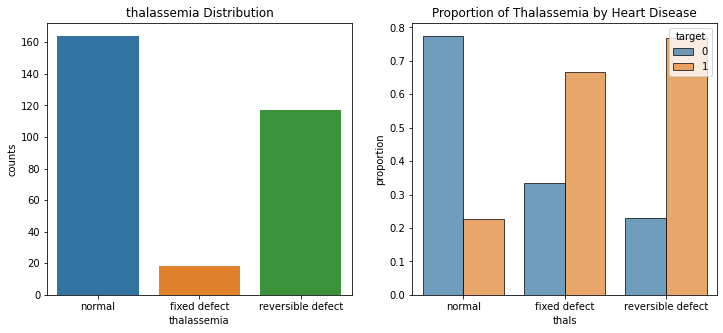

In [39]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=hd_.index, y=hd_.values, order=['normal', 'fixed defect', 'reversible defect'])
plt.title('thalassemia Distribution')
plt.xlabel('thalassemia')
plt.ylabel('counts')

plt.subplot(1,2,2)
sns.barplot(data=hd_thal, x='thals', y='proportion', hue='target', edgecolor='k', alpha=0.7, order=['normal', 'fixed defect', 'reversible defect'])
plt.title('Proportion of Thalassemia by Heart Disease')
plt.show()

지중해성 빈혈은 유전적 결함으로 인하여 적혈구 내 산소를 조직으로 운반하는 혈액 단백질인 헤모글로빈이 결핍되어 장애가 발생하는 혈액 질환이다. 알파형과 베타형으로 나뉘는데 본 데이터에서는 fixed defect와 reversible defect로 표현하고 있다. 

지중해빈혈은 문제가 되는 사슬의 종류나 유전형에 따라 증상도 다양하고, 처음 증상이 나타나는 시기도 다르다. 증상이 심한 베타 지중해빈혈의 경우는, 태어난 지 얼마 안 되어 증상이 시작된다. 두개골에 변화가 생기면서 이마가 돌출되거나 위턱이 과하게 커지는 특징적인 얼굴 모양이 생기거나 뼈가 쉽게 부러진다. 피부가 창백해지거나, 황달이 생겨서 노랗게 변하기도 한다. 적혈구를 처리하는 비장과 간이 커지면서 배가 부어오르고 신체 기능이 떨어지고 성장도 느리다. 

일부 지중해빈혈은 혈색소 수치가 치명적으로 낮아지기 때문에 평생 정기적으로 수혈을 받아야 한다. 하지만 이렇게 지속해서 수혈을 받으면 체내에 철이 쌓이면서 심장이나 간, 내분비계에 장애를 일으키기 때문에 철을 몸 밖으로 배출할 수 있는 치료도 받아야 하므로 지중해빈혈 환자는 감염질환에 걸릴 위험도 크다. 

따라서 지중해성 빈혈이 있으면 심장병의 위험이 큰것으로 나타났다.

(참조 : https://sev.severance.healthcare/health/encyclopedia/disease/disease.do?mode=view&articleNo=66574&title=%EC%A7%80%EC%A4%91%ED%95%B4%EB%B9%88%ED%98%88+Thalassaemia)

### 형광 투시로 확인된 주요 혈관 수

In [40]:
ca_ = hd['ca'].value_counts()

hd_ca = hd.groupby('ca')['target'].value_counts(normalize=True)
hd_ca.name = 'proportion'
hd_ca = hd_ca.reset_index()

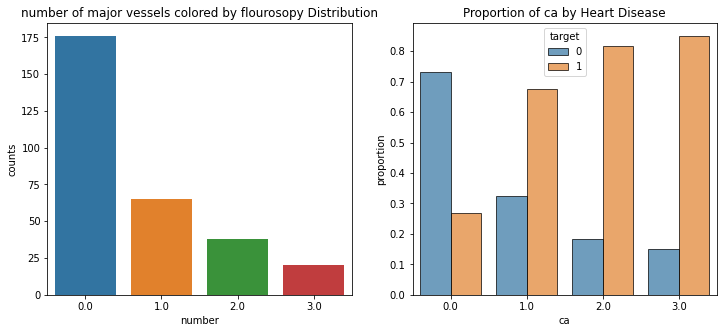

In [41]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=ca_.index, y=ca_.values)
plt.title('number of major vessels colored by flourosopy Distribution')
plt.xlabel('number')
plt.ylabel('counts')

plt.subplot(1,2,2)
sns.barplot(data=hd_ca, x='ca', y='proportion', hue='target', edgecolor='k', alpha=0.7)
plt.title('Proportion of ca by Heart Disease')
plt.show()

투시조영(Fluoroscopy) 검사를 통해 병변이 확인된 주요 혈관 수가 많을수록 심장병 위험이 높아진다. 병변이 확인된 혈관 수가 한 개 이상일 경우 심장병일 경우가 50% 이상으로 나타났다.

### 최대 심박수

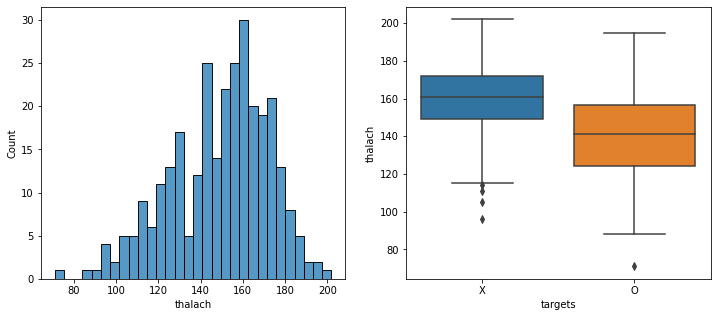

In [42]:
hd['targets'] = hd['target'].map({0: 'X', 1: 'O'})
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=hd, x='thalach', bins=30, ax=axes[0])
sns.boxplot(data=hd, x='targets', y='thalach', ax=axes[1])
plt.show()

최대심박수 분포에서 특이 이상치는 없으므로 그대로 사용하였다. 심장병이 있을 경우 최대심박수가 약간 낮게 나타나는 것을 볼 수 있다.

### 협심증(cp, exang)

In [43]:
hd['cps'] = hd['cp'].map({1: 'typical angina', 2: 'atypical angina', 3: 'non-anginal pain', 4 : 'asymptomatic'})
hd_ = hd['cps'].value_counts()

hd_cp = hd.groupby('cps')['target'].value_counts(normalize=True)
hd_cp.name = 'proportion'
hd_cp = hd_cp.reset_index()

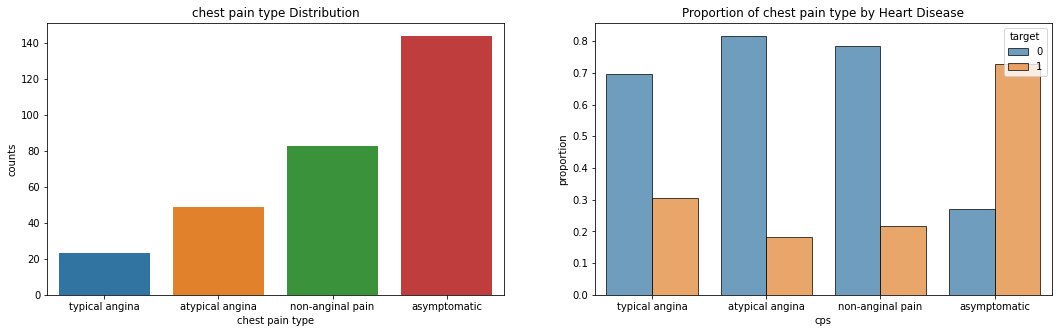

In [44]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.barplot(x=hd_.index, y=hd_.values, order=['typical angina','atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.title('chest pain type Distribution')
plt.xlabel('chest pain type')
plt.ylabel('counts')

plt.subplot(1,2,2)
sns.barplot(data=hd_cp, x='cps', y='proportion', hue='target', edgecolor='k', alpha=0.7, order=['typical angina','atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.title('Proportion of chest pain type by Heart Disease')
plt.show()

In [45]:
hd_ = hd['exang'].value_counts()

hd_exang = hd.groupby('exang')['target'].value_counts(normalize=True)
hd_exang.name = 'proportion'
hd_exang = hd_exang.reset_index()

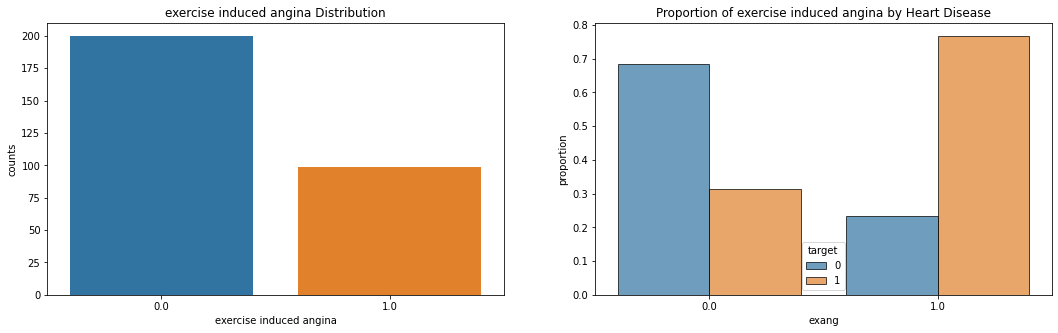

In [46]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.barplot(x=hd_.index, y=hd_.values)
plt.title('exercise induced angina Distribution')
plt.xlabel('exercise induced angina')
plt.ylabel('counts')

plt.subplot(1,2,2)
sns.barplot(data=hd_exang, x='exang', y='proportion', hue='target', edgecolor='k', alpha=0.7)
plt.title('Proportion of exercise induced angina by Heart Disease')
plt.show()

협심증의 경우 무증상일 때 심장병의 위험도가 높았다. 하지만 활동으로 인한 협심증이 나타날 경우에는 심장병의 위험도가 높게 나타났다.

### 휴식 대비 운동으로 인한 ST 하강

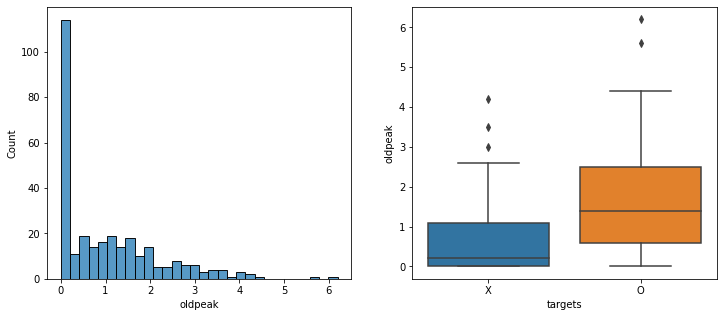

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=hd, x='oldpeak', bins=30, ax=axes[0])
sns.boxplot(data=hd, x='targets', y='oldpeak', ax=axes[1])
plt.show()

In [48]:
hd['oldpeak0'] = np.where(hd['oldpeak'] == 0, 0, 1)

In [49]:
hd_ = hd['oldpeak0'].value_counts()

hd_op = hd.groupby('oldpeak0')['target'].value_counts(normalize=True)
hd_op.name = 'proportion'
hd_op = hd_op.reset_index()

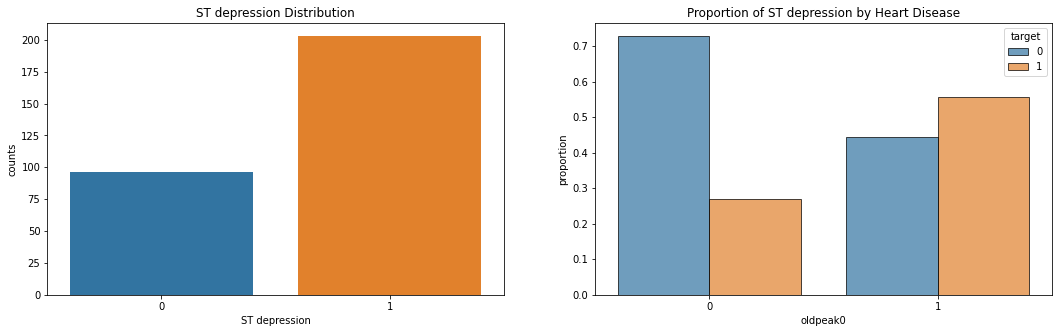

In [50]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.barplot(x=hd_.index, y=hd_.values)
plt.title('ST depression Distribution')
plt.xlabel('ST depression')
plt.ylabel('counts')

plt.subplot(1,2,2)
sns.barplot(data=hd_op, x='oldpeak0', y='proportion', hue='target', edgecolor='k', alpha=0.7)
plt.title('Proportion of ST depression by Heart Disease')
plt.show()

휴식 대비 운동으로 인한 ST 하강의 분포는 0이 가장 많고 2이하의 값에 가장 많이 분포하며 6이상의 이상치도 확인할 수 있다. 하강값이 클수록 심장병의 위험도가 높게 나타났다. 0의 경우가 많으므로 0일 경우와 0이 아닐 경우로 나뉘어 확인하였다. 하강값이 존재할 경우 심장병일 확률이 50%이상으로 나타났다.

## Conclusion

- 지중해 빈혈이 있을수록
- 형광 투시로 확인된 주요 병변 혈관 수가 많을수록
- 최대 심박수가 낮을수록
- 가슴 통증은 무증상이지만 활동으로 인해 협심증이 나타날 경우
- 휴식 대비 운동으로 인한 ST 하강이 존재할수록

심장병일 위험이 높다